**Project Description:**
Analyze bike-sharing data to understand key trends, identify significant factors affecting bike usage, and build a predictive model to forecast future demand. Special emphasis will be placed on comparing bike rentals on weekends versus weekdays. This project will involve data cleaning, exploratory data analysis (EDA), data visualization, feature engineering, and building both regression and classification models using Python.

**Data Collection and Import:**

Import necessary libraries.
Load the dataset into a pandas DataFrame.


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

df=pd.read_csv('train.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**Data Cleaning:**

Handle missing values.
Correct data types.
Remove duplicates.
Handle outliers.

In [6]:
# Handel Missing Values
df.dropna(inplace=True)
# Currect data types
df.dtypes
df['datetime'] = pd.to_datetime(df['datetime'])
# Remove duplicates
df.duplicated().sum()
df.drop_duplicates(inplace=True)
# Handle outliers in count (total bike rentals) using Z-score method
z_scores = stats.zscore(df['count'])
df = df[(z_scores > -3) & (z_scores < 3)]
df.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10739,10739.000000,10739.000000,10739.000000,10739.000000,10739.000000,10739.000000,10739.000000,10739.000000,10739.000000,10739.000000,10739.000000
mean,2011-12-24 06:00:22.124965120,2.500978,0.028960,0.676786,1.420710,20.130507,23.548846,62.049632,12.787706,35.220039,147.783779,183.003818
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.820000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-06-19 18:30:00,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,47.000000,7.001500,4.000000,35.000000,41.000000
50%,2011-12-17 19:00:00,2.000000,0.000000,1.000000,1.000000,20.500000,24.240000,62.000000,12.998000,16.000000,116.000000,141.000000
75%,2012-06-17 15:30:00,4.000000,0.000000,1.000000,2.000000,26.240000,31.060000,78.000000,16.997900,47.000000,217.000000,276.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.000000,45.455000,100.000000,56.996900,367.000000,712.000000,734.000000
std,NaN,1.119043,0.167702,0.467726,0.634956,7.777571,8.463179,19.241364,8.171075,49.546882,136.370597,166.681429


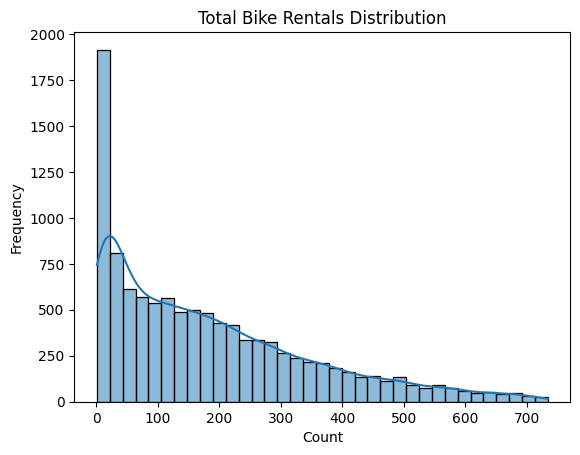

In [8]:
# Visualize data distributions
sns.histplot(df['count'],kde=True)
plt.title('Total Bike Rentals Distribution')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

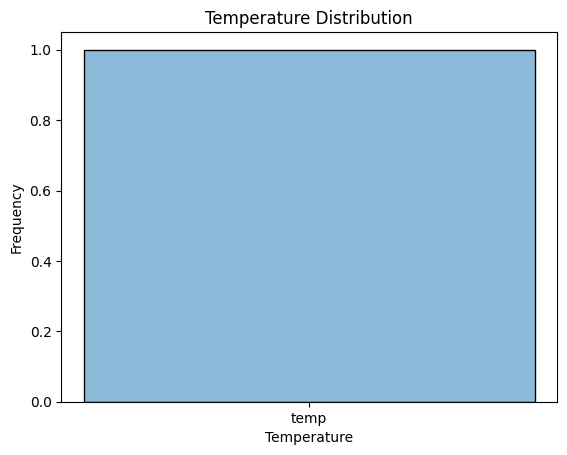

In [9]:
sns.histplot(['temp'],kde=True)
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show

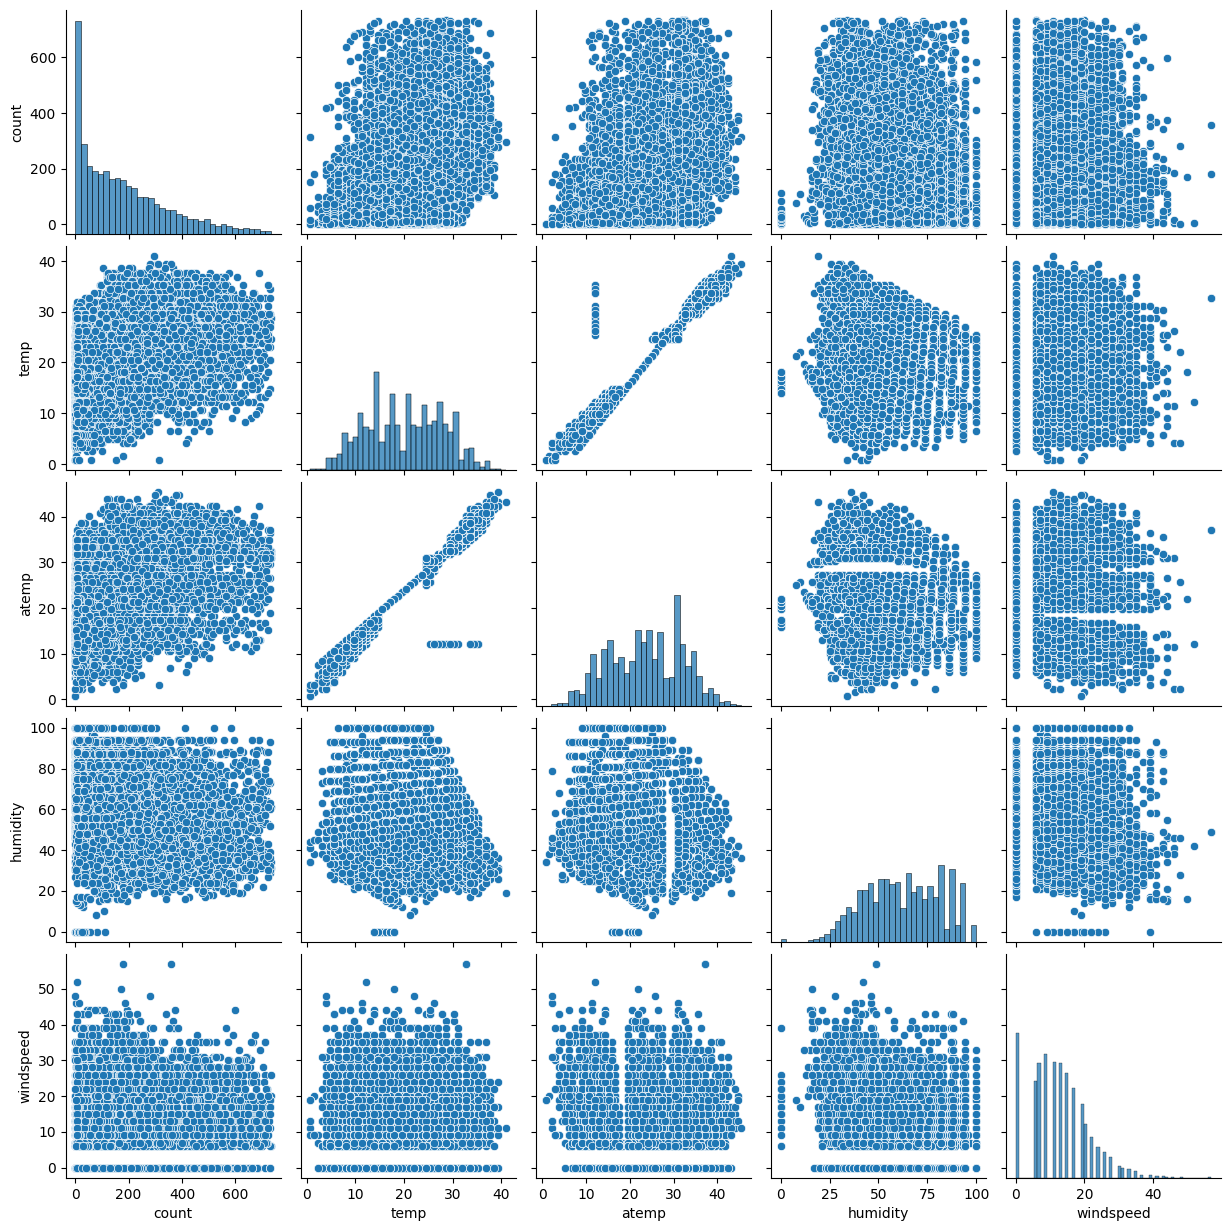

In [10]:
# Relatinships
sns.pairplot(df[['count','temp','atemp','humidity','windspeed']])
plt.show()

In [ ]:

# The pairplot shows the relationships between the different numerical columns in the DataFrame.
# Each chart shows the relationship between two columns.
# The diagonal charts show the distribution of each individual column.

# By looking at these charts, we can see that the distribution of the 'count' column is skewed to the right.
# This means that there are more days with a low number of rentals than days with a high number of rentals.

# We can also see that the distribution of the 'temp' column is roughly normal.
# This means that there are about the same number of days with each temperature.

# The pairplot shows that the 'count' column is positively correlated with the 'temp' column.
# This means that as the temperature increases, the number of rentals also tends to increase.


In [ ]:
# Correlation Heatmap
corr = df[['count','temp','humidity','windspeed']].corr()
corr

,count,temp,humidity,windspeed
count,1.000000,0.387873,-0.323013,0.110098
temp,0.387873,1.000000,-0.050777,-0.021871
humidity,-0.323013,-0.050777,1.000000,-0.319463
windspeed,0.110098,-0.021871,-0.319463,1.000000


In [ ]:
# The correlation coefficient is a measure of the strength of the relationship between two columns.
# It can range from -1 to 1.
# A correlation coefficient of 1 indicates a perfect positive correlation,
# a correlation coefficient of -1 indicates a perfect negative correlation,
# and a correlation coefficient of 0 indicates no correlation.

# The correlation heatmap shows that the 'count' column is positively correlated with the 'temp' column and negatively correlated with the 'humidity' and 'windspeed' columns.

# This means that as the temperature increases, the number of rentals also tends to increase.
# As the humidity and windspeed increase, the number of rentals tends to decrease.

**Data Visualization:**

Bike rentals trends over time.
Bike rentals distribution by season and weather.
Temperature, humidity, and windspeed trends.

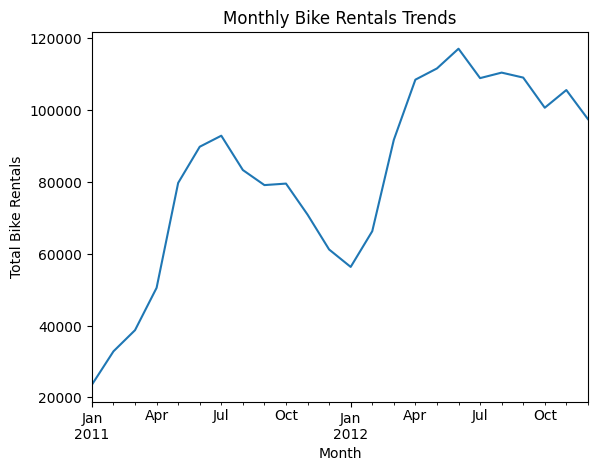

In [11]:
# Bike rentals trends over time
df.set_index('datetime')['count'].resample('M').sum().plot()
plt.title('Monthly Bike Rentals Trends')
plt.xlabel('Month')
plt.ylabel('Total Bike Rentals')
plt.show()

<ipython-input-32-1d2e415591fa>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weekend', y='count', data=weekend_rentals, palette='viridis')


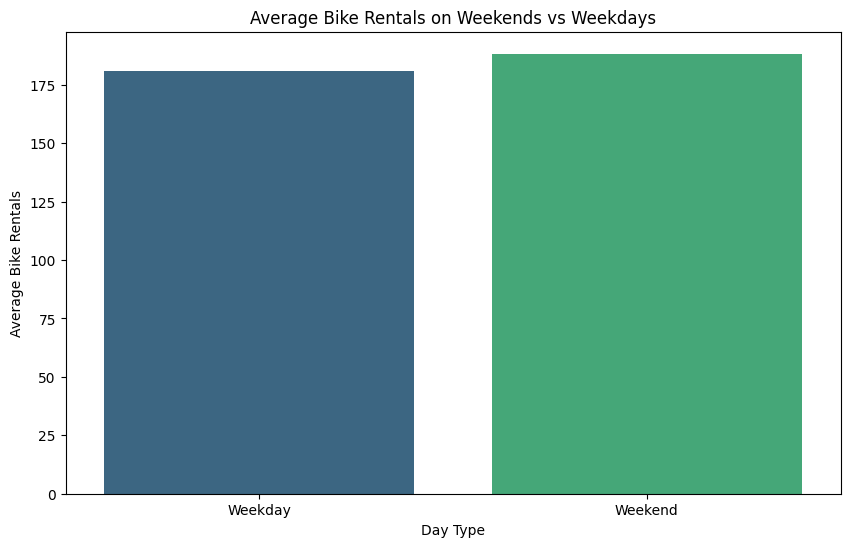

In [32]:
# Add a 'Weekend' column
df['weekend'] = df['Day of Week'].apply(lambda x: 1 if x >= 5 else 0)

# Plot average rentals on weekends vs weekdays
weekend_rentals = df.groupby('weekend')['count'].mean().reset_index()
weekend_rentals['weekend'] = weekend_rentals['weekend'].replace({0: 'Weekday', 1: 'Weekend'})

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='weekend', y='count', data=weekend_rentals, palette='viridis')
plt.title('Average Bike Rentals on Weekends vs Weekdays')
plt.xlabel('Day Type')
plt.ylabel('Average Bike Rentals')
plt.show()

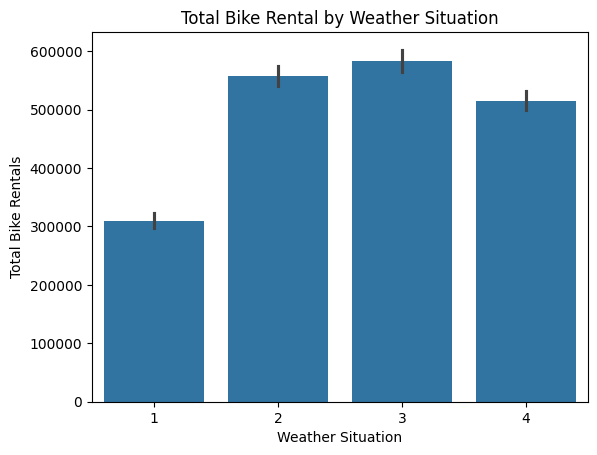

In [12]:
# Bike rentals distribution by season
sns.barplot(x='season', y='count', data = df, estimator=sum)
plt.title('Total Bike Rental by Weather Situation')
plt.xlabel('Weather Situation')
plt.ylabel('Total Bike Rentals')
plt.show()
#season -  1 = spring, 2 = summer, 3 = fall, 4 = winter

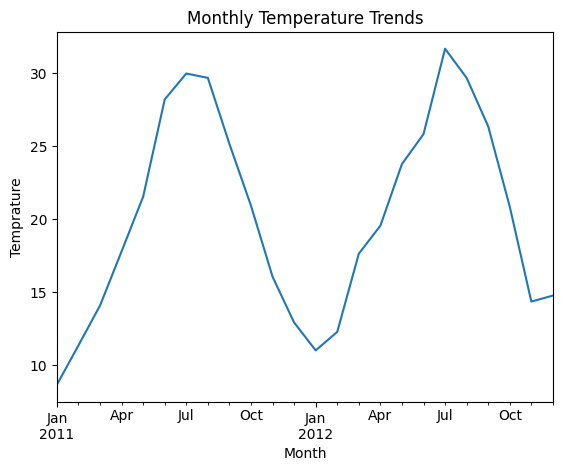

In [13]:
# Temperature trends
df.set_index('datetime')['temp'].resample('M').mean().plot()
plt.title('Monthly Temperature Trends')
plt.xlabel('Month')
plt.ylabel('Temprature')
plt.show()

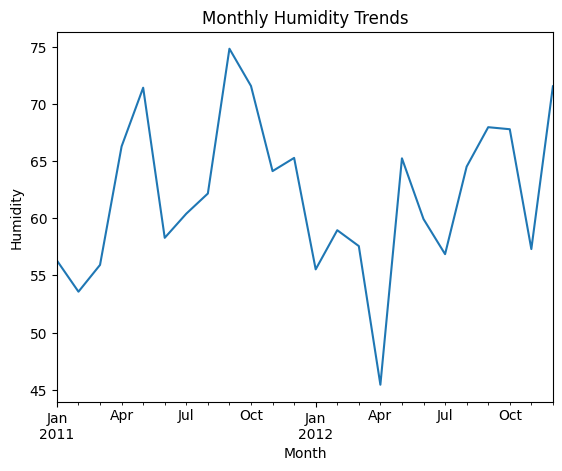

In [14]:
df.set_index('datetime')['humidity'].resample('M').mean().plot()
plt.title('Monthly Humidity Trends')
plt.xlabel('Month')
plt.ylabel('Humidity')
plt.show()

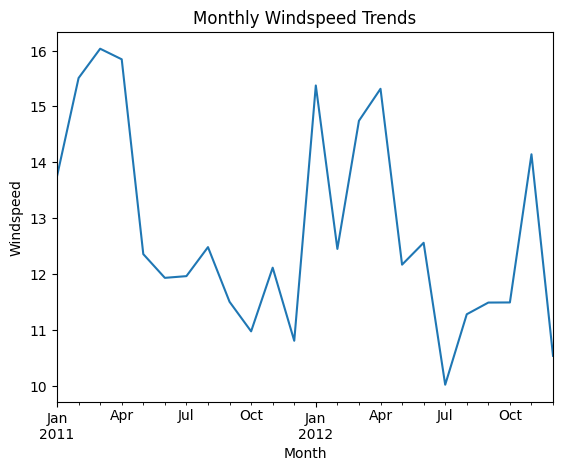

In [15]:
df.set_index('datetime')['windspeed'].resample('M').mean().plot()
plt.title('Monthly Windspeed Trends')
plt.xlabel('Month')
plt.ylabel('Windspeed')
plt.show()

**Feature Engineering:**

Create new features such as month, year, hour, and day of the week from the date.


Calculate the difference in temperature and windspeed.

In [16]:
df['Month'] = df['datetime'].dt.month
df['Year'] = df['datetime'].dt.year
df['Hour'] = df['datetime'].dt.hour
df['Day of Week'] = df['datetime'].dt.dayofweek
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Month,Year,Hour,Day of Week
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,1,2011,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,2011,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,1,2011,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,1,2011,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,1,2011,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,12,2012,19,2
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,12,2012,20,2
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,12,2012,21,2
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,12,2012,22,2


In [17]:
# Temperature and Windspeed differences

df['Temp Diff'] = df['temp'] - df['atemp']
df['Windspeed Diff'] = df['windspeed'].diff().fillna(0)
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Month,Year,Hour,Day of Week,Temp Diff,Windspeed Diff
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,1,2011,0,5,-4.555,0.0000
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,2011,1,5,-4.615,0.0000
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,1,2011,2,5,-4.615,0.0000
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,1,2011,3,5,-4.555,0.0000
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,1,2011,4,5,-4.555,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,12,2012,19,2,-4.115,2.0033
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,12,2012,20,2,-2.665,-11.0014
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,12,2012,21,2,-1.970,0.0000
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,12,2012,22,2,-3.485,-8.9981


**Building Predictive Models:**

Split data into training and testing sets.

regression and classification models.


Evaluate model performance.

**Building Predictive Models:**

Split data into training and testing sets.

Train regression and classification models.


Evaluate model performance.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [22]:
# Define features and target variable for regression
features = df[['temp', 'humidity', 'windspeed', 'Month', 'Year', 'Hour', 'Day of Week', 'season', 'weather']]
target = df['count']
print(features)
print(target)


        temp  humidity  windspeed  Month  Year  Hour  Day of Week  season  \
0       9.84        81     0.0000      1  2011     0            5       1   
1       9.02        80     0.0000      1  2011     1            5       1   
2       9.02        80     0.0000      1  2011     2            5       1   
3       9.84        75     0.0000      1  2011     3            5       1   
4       9.84        75     0.0000      1  2011     4            5       1   
...      ...       ...        ...    ...   ...   ...          ...     ...   
10881  15.58        50    26.0027     12  2012    19            2       4   
10882  14.76        57    15.0013     12  2012    20            2       4   
10883  13.94        61    15.0013     12  2012    21            2       4   
10884  13.94        61     6.0032     12  2012    22            2       4   
10885  13.12        66     8.9981     12  2012    23            2       4   

       weather  
0            1  
1            1  
2            1  
3      

In [23]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [26]:
# Train a linear regression model
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)


LinearRegression()

In [27]:
# Predict and evaluate
y_pred = lin_model.predict(X_test)
print(f'Linear Regression - MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'Linear Regression - MSE: {mean_squared_error(y_test, y_pred)}')
print(f'Linear Regression - R2: {r2_score(y_test, y_pred)}')

Linear Regression - MAE: 96.89572587541844
Linear Regression - MSE: 16026.527571950854
Linear Regression - R2: 0.3758559280190247


In [34]:

explained_variance = r2_score(y_test, y_pred) * 100
print(f'Linear Regression - Explained Variance: {explained_variance:.2f}%')


Linear Regression - Explained Variance: 37.59%


In [28]:
# Train a random forest regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [29]:
# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
print(f'Random Forest Regressor - MAE: {mean_absolute_error(y_test, y_pred_rf)}')
print(f'Random Forest Regressor - MSE: {mean_squared_error(y_test, y_pred_rf)}')
print(f'Random Forest Regressor - R2: {r2_score(y_test, y_pred_rf)}')


Random Forest Regressor - MAE: 26.232764742396025
Random Forest Regressor - MSE: 1910.3649377712861
Random Forest Regressor - R2: 0.9256019155816975


**Summary of Findings:**
- The distribution of bike rentals shows a right skew, indicating that most days have a moderate number of rentals, with a few days having very high rentals.

- The average bike rentals on weekends are higher than on weekdays.

- This suggests that people are more likely to rent bikes for leisure activities on weekends.

- Correlation analysis shows a strong positive relationship between temperature and bike rentals, and a negative relationship between humidity and bike rentals.

- Monthly and seasonal trends indicate higher bike rentals during warmer months and specific seasons.

**Model Performance:**
- The linear regression model showed an R2 score of 0.38, indicating that it explains 37.59% of the variance in bike rentals.

- The random forest regressor performed better, with a higher R2 score and lower MAE and MSE values.

**Actionable Insights:**
- Focus on promoting bike-sharing during warmer months and seasons.

- Bike-sharing companies can use this information to adjust their pricing and marketing strategies to target weekend riders.

- Optimize bike availability and maintenance during peak times identified from the data.

- Use the predictive model to forecast demand and adjust the number of bikes available accordingly.
